In [1]:
from fastai.vision import *

In [3]:
path = untar_data(URLs.PETS); path.ls()

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images')]

In [5]:
path_img = path/'images'

In [6]:
src = (ImageImageList.from_folder(path_img)
       .use_partial_data(0.3, seed=42)
       .split_by_rand_pct(0.1, seed=42))

In [9]:
bs,sz = 64,64
dbch = (src.label_from_func(lambda x: x)
        .transform(get_transforms(), tfm_y=True, size=sz)
        .databunch(bs=bs).normalize(imagenet_stats, do_y=True))

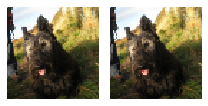

In [15]:
dbch.show_batch(rows=1, figsize=(3,3))

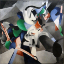

In [48]:
style_img = open_image('styles/udnie.jpg').resize(sz)
style_timg = normalize(style_img.px, *map(tensor, imagenet_stats)); style_img

In [46]:
style_timg = normalize(style_img.px, *map(tensor, imagenet_stats))

tensor([[[-1.2478, -1.3499, -1.3606,  ..., -0.8719, -0.8141, -1.1600],
         [-1.4272, -1.6601, -1.6659,  ..., -1.0388, -1.0836, -0.8913],
         [-1.4486, -1.5731, -1.6245,  ..., -1.1276, -1.0835, -0.9895],
         ...,
         [ 0.3700,  0.6390,  0.6525,  ..., -1.6540, -1.5998, -1.4711],
         [ 0.4233,  0.6499,  0.7281,  ..., -1.5525, -1.6624, -1.4800],
         [ 0.3695,  0.4727,  0.5398,  ..., -1.4928, -1.5804, -1.1910]],

        [[-1.1210, -1.1537, -1.2006,  ..., -0.6605, -0.6131, -0.9984],
         [-1.3201, -1.5054, -1.5175,  ..., -0.8630, -0.8747, -0.7903],
         [-1.3485, -1.4597, -1.4916,  ..., -0.9679, -0.8997, -0.8471],
         ...,
         [ 0.4047,  0.6322,  0.6995,  ..., -1.5788, -1.5458, -1.4600],
         [ 0.4283,  0.6378,  0.7450,  ..., -1.5198, -1.5814, -1.4001],
         [ 0.3759,  0.4592,  0.5774,  ..., -1.4531, -1.5343, -1.1188]],

        [[-0.8415, -0.8492, -0.9554,  ..., -0.3573, -0.3371, -0.6835],
         [-1.0231, -1.2101, -1.2614,  ..., -0